# PROJECT-3. Анализ воронки 


### Автор: Нечаев Сергей.  
### SkillFactory: SDA-3.0 Полный курс по анализу данных. 

### ЦЕЛЬ
#### Исследовать поведение пользователей в обновлённом приложении.

### ЗАДАЧИ
В рамках проверки гипотез вам необходимо решить три задачи:

##### 1. Определить, насколько обучение сокращает время прохождения этапов игры.
##### 2. Доказать, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.
##### 3. Определить, насколько прозрачен процесс взаимодействия с игрой.

### КОНКРЕТНЫЕ ШАГИ (ФОРМАЛИЗОВАННЫЕ ЗАДАЧИ)
##### 1. Сравнить время прохождения различных этапов для пользователей, которые прошли обучение, и пользователей, не начинавших обучение. Если показатель отличается, выяснить, насколько.
##### 2. Проверить, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь. 
##### 3. Выяснить, как часто пользователи начинают обучение после выбора уровня сложности. (Это позволит оценить прозрачность процесса взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.)

### ИСХОДНЫЕ ДАННЫЕ
#### Таблица Event.  
Хранит данные о событиях, которые совершают пользователи. По сути, каждое событие — это факт прохождения пользователем какого-либо этапа игры.   

Название поля:          Описание   
id:                  идентификатор события    
user_id:	            уникальный идентификатор пользователя, совершившего событие в приложении   
start_time:          дата и время события   
event_type:	        тип события  (значения: registration — регистрация; tutorial_start — начало обучения; tutorial_finish — завершение обучения;  
                    level_choice — выбор уровня сложности; pack_choice — выбор пакетов вопросов)
tutorial_id:	        идентификатор обучения (этот идентификатор есть только у событий обучения)
selected_level:	    выбранный уровень сложности обучения

#### Таблица purchase  
Хранит данные об оплатах, которые совершают пользователи.  

Название поля:	    Описание   
id:	                идентификатор события   
user_id:            уникальный идентификатор пользователя, совершившего событие в приложении  
event_datetime:  	дата и время события/покупки  
amount:	            сумма оплаты   


ПОСЛЕДОВАТЕЛЬНОСТЬ ДЕЙСТВИЙ 

0. Загрузить, проверить корректность загрузки, преобразовать исходные данные.   
    0.1. Загрузить исходные данные таблицы Event, проверить структуру данных.   
    0.2. Сделать срез данных по пользователям, зарегистрированным в 2018 году.    
    0.3. Проверить корректность данных в таблице Event по "контрольным точкам".    
    0.4. Загрузить исходные данные таблицы purchase, проверить структуру данных, сделать срез по 2018 году.   
    0.5. Проверить корректность данных в таблице purchase по "контрольным точкам".   
    0.6. Объединить таблицы в единый датафрейм, убрать лишние столбцы, преобразовать даты.     

1. Сравнить время прохождения различных этапов для пользователей, которые завершили обучение, и пользователей, не начинавших обучение. Если показатель отличается, выяснить, насколько.    
    1.1. Выделить группы пользователей: обучавшихся (начавших и завершивших или не завершивших обучение) -группа А и НЕ начинавших обучение -группа В.   
    1.2. Определить среднее время прохождения различных этапов игры пользователями групп А и В.     
    1.3. Построить графики сравнения времени прохождения каждого этапа игры в группах А и В.   
    1.4. Сравнить, сделать выводы о влиянии обучения на скорость прохождения игры.
 
2. Проверить, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь.   
    2.1. Выделить группы пользователей, которые хотя бы один раз начинали обучение, разбить на группы по количеству обучений (количество фактов начала обучения).   
    2.2. Посчитать внутри каждой группы долю оплативших за вопросы хотя бы один раз (кол-во оплативших пользователей / кол-во всех пользователей в группе).  
    2.3. Сравнить полученные данные на графике (диаграмме), сделать выводы

3. Выяснить, как часто пользователи начинают обучение после выбора уровня сложности.    
    3.1. Посчитать все случаи выбора обучения и все случаи выбора уровня сложности.  
    3.2. Посчитать события выбора уровня сложности РАНЬШЕ начала обучения.   
    3.3. Определить долю таких случаев в общем количестве случаев выбора уровня и в общем количестве случаев обучения. Сделать выводы



0. Загрузка, проверка корректности загрузки, преобразование исходных данных  


0. 
   1. Загрузим исходные данные таблицы Event, проверим структуру данных.  

In [1]:
import pandas as pd
# Загружаем исходные данные, смотрим структуру,   
events_df = pd.read_csv('D:\Sergey\SkillFactory\IDE\date/7_4_Events.csv')
#смотрим структуру таблицы
# events_df.info()

In [2]:
# смотрим выборку первых строк таблицы
# events_df.head()

0. 
   2. Сделаем срез данных по пользователям, зарегистрированным в 2018 году.    

In [3]:
# проверяем на корректность (для проверки используем "контрольные точки" выполненных заданий Модуля 38) 
# Для отбора из исходной таблицы данных по пользователям, зарегистрированным в 2018 году, воспользуемся вспомогательной функцией поиска года по шаблону
import re 
def get_year_release(arg):
    #находим все слова по шаблону "DDDD-"
    candidates = re.findall(r'\d{4}\-', arg) 
    # проверяем число вхождений
    if len(candidates) > 0:
        #если число вхождений больше 0,
	#очищаем строку от знака "-"
        year = candidates[0].replace('-', '')
        return int(year)
    else:
        #если год не указан, возвращаем None
        return None
    
# введем вспомогательный столбец с годом start_year, применив нашу функцию к столбцу с датой  start_time нашего дата фрейма events_df
events_df['start_year'] = events_df['start_time'].apply(get_year_release)
# фильтруем и создаем список попользователей, зарегистирированных в 2018 году 
mask1 = events_df['start_year'] == 2018
mask2 = events_df['event_type'] == 'registration'
users_2018 = events_df[mask1 & mask2]['user_id'].to_list()
# снова фильтруем таблицу, оставляя только строки с пользователями, зарегистрированными в 2018 году
events_df  = events_df[events_df['user_id'].isin(users_2018)]
# теперь можно удалить вспомогательный столбец start_year
events_df.drop(['start_year'], axis=1, inplace=True)
events_df.head()

,id,event_type,selected_level,start_time,tutorial_id,user_id
51405,80308,registration,NaN,2018-01-01T03:48:40,NaN,27832
51406,80309,registration,NaN,2018-01-01T04:07:25,NaN,27833
51407,80310,registration,NaN,2018-01-01T08:35:10,NaN,27834
51408,80311,registration,NaN,2018-01-01T11:54:47,NaN,27835
51409,80312,registration,NaN,2018-01-01T13:28:07,NaN,27836


0. 
   3. Проверим корректность данных в таблице Event по "контрольным точкам".  

In [4]:
# Проверим, сколько строк в таблице? 
events_df.shape
# Контрольная точка 1:    Должно быть  66959 строк

(66959, 6)

In [5]:
# Сколько уникальных пользователей совершали события в 2018 году?
events_df['user_id'].nunique()
# Контрольная точка 2:  Должно быть 19926

19926

In [6]:
# А сколько пользователей совершают событие registration?
events_df[events_df['event_type'] == 'registration']['user_id'].nunique()
# Контрольная точка 3:  Должно быть 19926

19926

Отлично! Все пользовател прошли обязательный этап регистрации!          
Ошибок в датафрейме events_df нет!

0. 
   4. Загрузим исходные данные таблицы purchase, проверим структуру данных, сделаем срез по 2018 году.

In [7]:
purchase_df = pd.read_csv('D:\Sergey\SkillFactory\IDE\date/purchase.csv')
# purchase_df.head()

In [8]:
# purchase_df.info()

In [9]:
# Отфильтруем  таблицу purchase_df по пользователям, зарегистрированным в 2018 году
purchase_df  = purchase_df[purchase_df['user_id'].isin(users_2018)]


0. 
   5. Проверим корректность данных в таблице purchase по "контрольным точкам". 

In [10]:
# Сколько строк содержится в датафрейме purchase_df?    
purchase_df.shape
# контрольная точка 4: Должно быть 1600  

(1600, 4)

In [11]:
# Есть ли пропущенные значения в датафрейме purchase_df?   
purchase_df.info()
# контрольная точка 5:     НЕТ

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 1171 to 2778
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1600 non-null   int64 
 1   user_id         1600 non-null   int64 
 2   event_datetime  1600 non-null   object
 3   amount          1600 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.5+ KB


Отлично!   
Загрузка и обработка таблицы purchase проведена успешно!

0. 
   6. Объединим таблицы в единый датафрейм, уберем лишние столбцы? преобразуем даты. 

In [12]:
# но перед этим создадим в датафрейме  purchase_df   столбец  event_type  и заполним его значениями   purchase
purchase_df['event_type'] = 'purchase'

# Nак как столбец id в events_df указывает на идентификатор события, а столбец id в purchase_df указывает на идентификатор оплаты? 
# применим функцию rename(), чтобы переименовать столбцы в датафреймах.
events_df = events_df.rename(columns={"id": "event_id"})
purchase_df = purchase_df.rename(columns={"id": "purchase_id", "event_datetime": "start_time"})

# Следующим шагом объединим датафреймы events_df и purchase_df с помощью функции pd.concat() и 
# запишем объединённый датафрейм в переменную total_events_df.
total_df = pd.concat([events_df,purchase_df],sort=False)

# Переведем start_time в формат двты
total_df['start_time'] = pd.to_datetime(total_df['start_time'] )
    
# Cбросим индексы объединённого датафрейма (так как после объединения они дублировались и несут мало смысла) с помощью метода reset_index() и 
# отсортируем все события по возрастанию времени с помощью sort_values().
total_df = total_df.reset_index(drop=True).sort_values('start_time')

# Смотрим иоговую обьединенную таблицу
total_df.info()
total_df.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 68559 entries, 0 to 68558
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_id        66959 non-null  float64       
 1   event_type      68559 non-null  object        
 2   selected_level  8342 non-null   object        
 3   start_time      68559 non-null  datetime64[ns]
 4   tutorial_id     32954 non-null  float64       
 5   user_id         68559 non-null  int64         
 6   purchase_id     1600 non-null   float64       
 7   amount          1600 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 4.7+ MB


(68559, 8)

Все! Объединенная таблица готова!   
Сделаем копию объединенного датафрейма (чтобы была возможность к ней возвращаться при необходимости)

In [13]:
total_becup =total_df.copy()

## Гипотеза 1

1. Сравнить время прохождения различных этапов для пользователей, которые завершили обучение, и пользователей, не начинавших обучение. Если показатель отличается, выяснить, насколько.    

1. 
   1. Выделим группы пользователей: обучавшихся (начавших и завершивших или не завершивших обучение) -группа А и не начинавших обучение -группа В.  

In [14]:
p = total_df['user_id'].unique()
print(len(p))


19926


In [15]:
# Создадим cсводную таблицу со строками urer_id, в столбцы выведем признак выбора события  event_type, значениями будет минимальное время события (или о)
total_pivot = total_df.pivot_table(
    values='start_time',
    index='user_id', 
    columns='event_type',
    aggfunc='min',
)
# переименуем столбцы
total_pivot.columns = ['level_choice','pack_choice','purchase','registration','tutorial_finish','tutorial_start']
# добавим столбец с признаком группы (А - есть tutorial_start, B - нет tutorial_start)
total_pivot['group'] = total_pivot['tutorial_start'].apply(lambda x: 'B_not_tut' if pd.isnull(x) else 'A_tut')
# total_events_pivot.info() 
#display(total_pivot)

 1. 
    2. Определим среднее время прохождения различных этапов игры пользователями групп А и В.   

In [16]:
# Посчитаем взаимные интервалы между событиями в часах: 
# от регистрации до выбора уровня
total_pivot['int_reg_lc'] = (total_pivot['level_choice'] - total_pivot['registration'])/pd.Timedelta('1 hour') 
# от регистрации до выбора пакета
total_pivot['int_reg_pc'] = (total_pivot['pack_choice'] - total_pivot['registration'])/pd.Timedelta('1 hour') 
# от регистрации до оплаты
total_pivot['int_reg_ph'] = (total_pivot['purchase'] - total_pivot['registration'])/pd.Timedelta('1 hour') 
# от выбора уровня до выбора пакета
total_pivot['int_lc_pс'] = (total_pivot['pack_choice'] - total_pivot['level_choice'])/pd.Timedelta('1 hour') 
# от выбора уровня до оплаты
total_pivot['int_lc_ph'] = (total_pivot['purchase'] - total_pivot['level_choice'])/pd.Timedelta('1 hour')
# от выбора пакета до оплаты
total_pivot['int_pc_ph'] = (total_pivot['purchase'] - total_pivot['pack_choice'])/pd.Timedelta('1 hour') 

# Удалим лишние столбцы
total_pivot.drop(['level_choice','pack_choice','purchase','registration','tutorial_finish','tutorial_start'], axis=1, inplace=True)
display(total_pivot)


,group,int_reg_lc,int_reg_pc,int_reg_ph,int_lc_pс,int_lc_ph,int_pc_ph
user_id,,,,,,,
27832,B_not_tut,NaN,NaN,NaN,NaN,NaN,NaN
27833,A_tut,NaN,NaN,NaN,NaN,NaN,NaN
27834,A_tut,NaN,NaN,NaN,NaN,NaN,NaN
27835,A_tut,8.709722,8.732222,NaN,0.022500,NaN,NaN
27836,A_tut,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
47753,A_tut,3.623333,3.652778,NaN,0.029444,NaN,NaN
47754,B_not_tut,NaN,NaN,NaN,NaN,NaN,NaN
47755,A_tut,7.827222,NaN,NaN,NaN,NaN,NaN


 1. 
    2. Построим графики сравнения времени прохождения каждого этапа игры в группах А и В. 

In [17]:
# Сгруппируем нашу сводную по группам A и B
total_pivot1 = total_pivot.groupby(['group'])[
    'int_reg_lc', 'int_reg_pc', 'int_reg_ph', 'int_lc_pс', 'int_lc_ph', 'int_pc_ph'
    ].mean()
display(total_pivot1)

C:\Users\Администратор\AppData\Local\Temp\ipykernel_7648\3004755837.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_pivot1 = total_pivot.groupby(['group'])[


,int_reg_lc,int_reg_pc,int_reg_ph,int_lc_pс,int_lc_ph,int_pc_ph
group,,,,,,
A_tut,7.194730,7.27969,96.919904,0.088067,89.717616,89.627522
B_not_tut,5.259201,5.12116,105.100530,0.089951,100.915631,100.825997


In [18]:
# Для визуализации будем использовать библиотеку Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

''

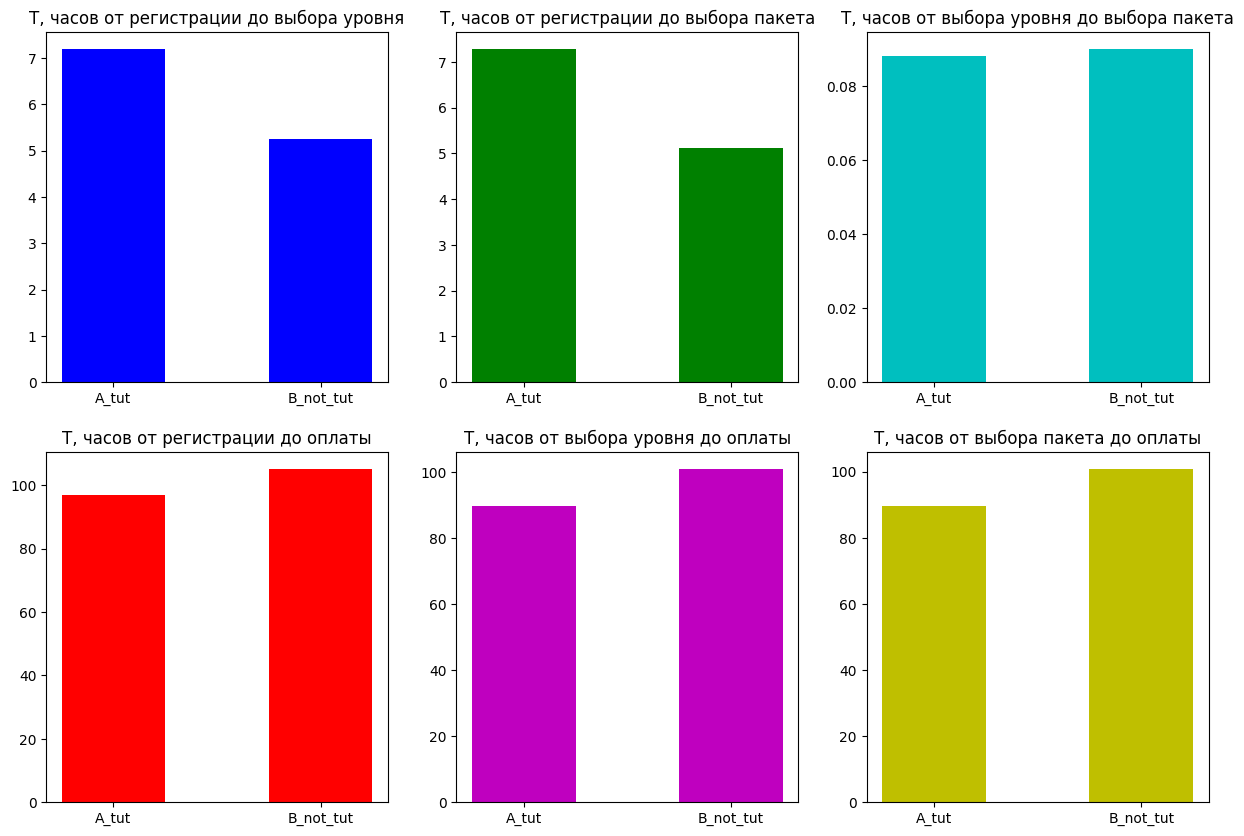

In [19]:
# построим 6 столбцатых диаграмм для каждого интервала
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes[0][0].bar(x = total_pivot1.index, height=total_pivot1['int_reg_lc'], width=0.5, color = 'b')
axes[0][0].set_title('T, часов от регистрации до выбора уровня')

axes[0][1].bar(x = total_pivot1.index, height=total_pivot1['int_reg_pc'], width=0.5, color = 'g')
axes[0][1].set_title('T, часов от регистрации до выбора пакета')

axes[0][2].bar(x = total_pivot1.index, height=total_pivot1['int_lc_pс'], width=0.5, color = 'c')
axes[0][2].set_title('T, часов от выбора уровня до выбора пакета')

axes[1][0].bar(x = total_pivot1.index, height=total_pivot1['int_reg_ph'], width=0.5, color = 'r')
axes[1][0].set_title('T, часов от регистрации до оплаты')

axes[1][1].bar(x = total_pivot1.index, height=total_pivot1['int_lc_ph'], width=0.5, color = 'm')
axes[1][1].set_title('T, часов от выбора уровня до оплаты')

axes[1][2].bar(x = total_pivot1.index, height=total_pivot1['int_pc_ph'], width=0.5, color = 'y')
axes[1][2].set_title('T, часов от выбора пакета до оплаты')
;


1. 
    4. Сравним, сделаем выводы о влиянии обучения на скорость прохождения игры.

### Выводы по гипотезе 1:

1. Среднее время от регистрации до выбора уровня сложности и время  от регистрации до выбора пакета вопросов у обучающихся пользователей больше, что вполне логично, т.к. в этом промежутке они проходят обучение.
2. Интервал времени от выбора уровня  до выбора в обоих группах примерно совпадает и очень мал, вероятно, так устроена логика игры, что эти этапы практически совпадают по времени.
3. А вот временнЫе интервалы, в конечном итоге приводящие к оплате, у обучающихся пользователей в среднем на 10% меньше, чем у тех, кто не начинал обучение.

### Таким образом, Гипотеза 1 подтверждается: Прохождение обучения ускоряет на 10% время принятия решения пользователя об оплате игры, иными словами, ускоряет процесс конверсии. 



## Гипотеза 2

2. Проверить, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь.   

2. 
   1. Выделим группы пользователей, которые хотя бы один раз начинали обучение, разобьем на группы по количеству обучений (количество фактов начала обучения).   
     

In [20]:
# создадим копию объединенного датафрейма
total_df2 = total_becup.copy()

# Создадим cсводную таблицу со строками urer_id, в столбцы выведем признак выбора события  event_type, значениями будет количество событий 
total_pivot2 = total_df2.pivot_table(
    values='start_time',
    index='user_id', 
    columns='event_type',
    aggfunc='count',
)

# Удалим лишние столбцы
total_pivot2.drop(['level_choice','pack_choice','registration','tutorial_finish'], axis=1, inplace=True)
# переименуем столбцы
total_pivot2.columns = ['purchase_cnt','tut_start_cnt']
# отфильтруем, оставив строки с обучением
total_pivot2 = total_pivot2[total_pivot2['tut_start_cnt']>0]
# добавим столбец с группами пользователей по количеству обучений 
total_pivot2['group_tut'] = total_pivot2['tut_start_cnt'].round(0)
total_pivot2 = total_pivot2.groupby(['group_tut']).count()

display(total_pivot2)

,purchase_cnt,tut_start_cnt
group_tut,,
1.0,1207,9103
2.0,218,1589
3.0,51,427
4.0,30,221
5.0,16,109
6.0,14,116
7.0,12,94
8.0,13,86
9.0,17,113


In [21]:
# добавим столбец с долей оплативших в общем количестве начинавших обучение в каждой группе
total_pivot2['CR'] = (total_pivot2['purchase_cnt'] / total_pivot2['tut_start_cnt']  * 100).round(1)
# добавим столбец с долей пользователей каждой группы в общем количестве начинавших обучение
total_pivot2['tut_proc'] = total_pivot2['tut_start_cnt'] / total_pivot2['tut_start_cnt'].sum() * 100 
# добавим столбец с группами (пригодится для построения диаграмм) 
total_pivot2['grp'] = total_pivot2.index
display(total_pivot2)

,purchase_cnt,tut_start_cnt,CR,tut_proc,grp
group_tut,,,,,
1.0,1207,9103,13.3,76.766740,1.0
2.0,218,1589,13.7,13.400236,2.0
3.0,51,427,11.9,3.600945,3.0
4.0,30,221,13.6,1.863721,4.0
5.0,16,109,14.7,0.919211,5.0
6.0,14,116,12.1,0.978243,6.0
7.0,12,94,12.8,0.792714,7.0
8.0,13,86,15.1,0.725249,8.0
9.0,17,113,15.0,0.952943,9.0


2. 
    3. Сравним полученные данные на графике (диаграмме), сделаем выводы

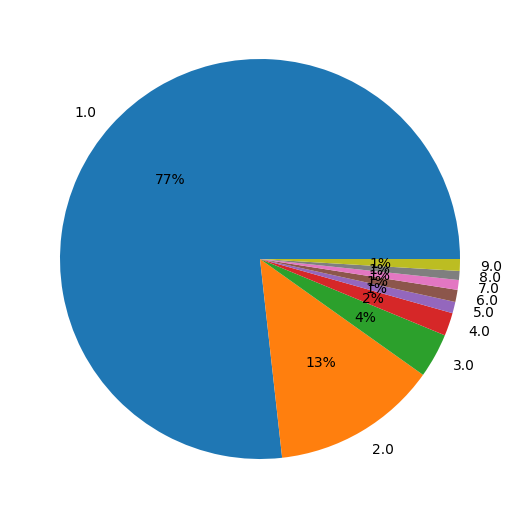

In [22]:
# Построим круговую диаграмму для доли пользователей каждой группы от всех пользователей
proc_tut = total_pivot2['tut_proc']
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    proc_tut,
    labels=proc_tut.index,
    autopct='%.0f%%',
    explode = [0, 0, 0, 0, 0, 0, 0, 0, 0]
); 

In [23]:
# построим столбцатую диаграмму вероятности оплаты в зависимости от количества обучений
import plotly
import plotly.express as px
plotly.__version__
#строим график
fig = px.bar(
    data_frame=total_pivot2, #датафрейм
    x="grp", #ось x
    y="CR", #ось y
    color='grp', #расцветка в зависимости от страны
    text = 'CR', #текст на столбцах
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    title='Вероятность оплаты от количества обучений, %' #заголовок
)

#отображаем его
fig.show()

### Выводы по гипотезе 2:

1. Анализ обучающихся пользователей пользователей показал, что практически 3/4 проходят обучение по одному разу. Можно предположить, что они с первого раза осваивают правила. С учетом пользователей, которые начинали обучение второй раз эта доля достигает 90%. Очень хороший результат.
2. Но настораживает наличие пользователей, которые начинают обучение 3 раза и более (до 9 раз). Это может говорить о том, 10 % далеко не сразу понимают правила, и что успокаиваться не стоит и надо поработать над программой обучения.
3. А вот анализ вероятность оплаты не зависит от количества обучений, во всех группах показатель примерно одинаковый, на уровне 12-15 %

### Таким образом, Гипотеза 2 Не подтверждается: существенной зависимости вероятности оплаты от количества обучений не выявлено. 



## Гипотеза 3


3. Выяснить, как часто пользователи начинают обучение после выбора уровня сложности.    

  3.     
        1. Посчитаем все случаи выбора обучения и все случаи выбора уровня сложности.

In [24]:
# вернемся к ранее созданному объединенному датафрейму, отсортируем по времени
total_df3 = total_becup.copy().sort_values(['start_time'])

# создадаи датафрейм, содержщий все случаи обращения к этапу обцчения. Посчитаем их общее количество. 
total_df3_tut = total_df3[total_df3['event_type'] == 'tutorial_start']
total_df3_tut.drop(['event_id', 'event_type', 'selected_level','tutorial_id', 'purchase_id', 'amount'], axis=1, inplace=True)
total_df3_tut.columns = ['start_tut', 'user_id']
total_df3_tut = total_df3_tut.sort_values(['user_id', 'start_tut'], ascending=[True,True])
cnt_all_tut = len(total_df3_tut)
print('Количество событий выбора обучения:', cnt_all_tut)

Количество событий выбора обучения: 18050


C:\Users\Администратор\AppData\Local\Temp\ipykernel_7648\3706433791.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
# создадаи датафрейм с пользователями, выбравшими уровень обучение, найдем их общее количество
total_df3_level = total_df3[total_df3['event_type'] == 'level_choice']
total_df3_level.drop(['event_id', 'event_type', 'selected_level','tutorial_id', 'purchase_id', 'amount'], axis=1, inplace=True)
total_df3_level.columns = ['start_level', 'user_id']
cnt_level = len(total_df3_level)
print('Количество событий выбора уровня сложности:', cnt_level)

Количество событий выбора уровня сложности: 8342


C:\Users\Администратор\AppData\Local\Temp\ipykernel_7648\3796038902.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
# объединим две таблицы
df3 = total_df3_tut.merge(total_df3_level, on = 'user_id', how = 'outer')
display(df3)

,start_tut,user_id,start_level
0,2018-01-01 17:47:40,27833,NaT
1,2018-01-01 19:46:11,27834,NaT
2,2018-01-01 15:00:51,27835,2018-01-01 20:37:22
3,2018-01-01 14:54:40,27836,NaT
4,2018-01-01 15:40:43,27836,NaT
...,...,...,...
18143,NaT,46472,2018-12-07 16:47:23
18144,NaT,46548,2018-12-08 20:26:22
18145,NaT,46887,2018-12-14 03:27:28
18146,NaT,46996,2018-12-16 01:06:43


3.    
    2. Выделим события выбора уровня сложности РАНЬШЕ начала обучения среди всех фактов обучения.  

In [27]:
# создадим столбец с интервалом между обучением и выбором уровня
df3['int_tut_level'] = (df3['start_level'] - df3['start_tut'])/pd.Timedelta('1 hour')
display(df3)

,start_tut,user_id,start_level,int_tut_level
0,2018-01-01 17:47:40,27833,NaT,NaN
1,2018-01-01 19:46:11,27834,NaT,NaN
2,2018-01-01 15:00:51,27835,2018-01-01 20:37:22,5.608611
3,2018-01-01 14:54:40,27836,NaT,NaN
4,2018-01-01 15:40:43,27836,NaT,NaN
...,...,...,...,...
18143,NaT,46472,2018-12-07 16:47:23,NaN
18144,NaT,46548,2018-12-08 20:26:22,NaN
18145,NaT,46887,2018-12-14 03:27:28,NaN
18146,NaT,46996,2018-12-16 01:06:43,NaN


In [28]:
# найдем количество случаев, когда обучение было позже выбора уровня (int_tut_level < 0)
cnt_level_befor_tut = df3[df3['int_tut_level'] < 0].count()['int_tut_level']
print('Количество случаев выбора уровня сложности раньше обучения:', cnt_level_befor_tut)

Количество случаев выбора уровня сложности раньше обучения: 2792


3. 
    3.  Определим долю таких случаев в общем количестве случаев выбора уровня и в общем количестве случаев обучения. Сделать выводы

In [29]:
# Доля случаев когда пользователи, выбравшие уровень игры, после этого выбирали обучение
proc_tut_after_lev_of_lev = cnt_level_befor_tut / cnt_level 
print('Доля случаев обращения к обучению после выбора уровня игры от всех случаев выбора уровня: {:.1%}'.format(proc_tut_after_lev_of_lev))
# Доля случаев, когда пользователи, выбравшие обучение, выбирали его после выбора уровня
proc_tut_after_lev_of_tut = cnt_level_befor_tut / cnt_all_tut 
print('Доля случаев обрашения к обучению после выбора уровня игры от всех случаев обучения: {:.1%}'.format(proc_tut_after_lev_of_tut))


Доля случаев обращения к обучению после выбора уровня игры от всех случаев выбора уровня: 33.5%
Доля случаев обрашения к обучению после выбора уровня игры от всех случаев обучения: 15.5%


### Выводы по гипотезе 3:

1. Дальнейший Анализ поведения пользователей показал, что в 33,5% от всех случаев выбора уровеня сложности пользователи возвращаются к обучению.
2. И из всех фактоа обращения к обучению 15,5% происходит уже после выбора уровня игры.

### Таким образом, Гипотеза 3 подтверждается: В 33,5% от всех случаев выбора уровня игры пользователи возвращаются к обучению, значит, взаимодействие в игровым приложением непонятна.

### Итог:
#### Гипотеза 1 подтверждается: Прохождение обучения на 10% ускоряет принятие решения пользователя об оплате игры, иными словами, ускоряет процесс конверсии. 

#### Гипотеза 2 Не подтверждается: существенной зависимости вероятности оплаты от количества обучений не выявлено. 

#### Гипотеза 3 подтверждается: В 33,5% от всех случаев выбора уровня игры пользователи возвращаются к обучению, значит, взаимодействие в игровым приложением непонятна.